It will help to define good locations in the Financial District for a Brunch (food) truck using the available MTA Turnstile data in 2021. (e.g., foot traffic, # of turnstiles, entries vs. exits, busy time frames, etc.)

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
# Get MTA data from January to
engine = create_engine("sqlite:///mta_data.db")
engine.table_names()
df_all = pd.read_sql('SELECT * FROM mta_data;', engine)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802
...,...,...,...,...,...,...,...,...,...,...,...
3738783,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,04:00:00,REGULAR,5554,541
3738784,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,08:00:00,REGULAR,5554,541
3738785,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,12:00:00,REGULAR,5554,541
3738786,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,16:00:00,REGULAR,5554,541


In [38]:
df_all[df_all['STATION']=='BROAD ST'].DATETIME.dt.month.unique()
#df_all.STATION.unique()

array([ 8,  7,  6,  5, 12], dtype=int64)

In [3]:
df_all['DATETIME'] = pd.to_datetime(df_all['DATE']+ ' '+df_all['TIME'])
df_all

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689,2021-08-21 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697,2021-08-21 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718,2021-08-21 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766,2021-08-21 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802,2021-08-21 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3738783,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,04:00:00,REGULAR,5554,541,2020-12-31 04:00:00
3738784,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,08:00:00,REGULAR,5554,541,2020-12-31 08:00:00
3738785,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,12:00:00,REGULAR,5554,541,2020-12-31 12:00:00
3738786,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,16:00:00,REGULAR,5554,541,2020-12-31 16:00:00


In [27]:
# Filter 8AM and 4PM
df_main = df_all[df_all['DESC']=='REGULAR']
df_main = df_main[(df_main['DATETIME'].dt.strftime('%H:%M:%S')=='08:00:00')|(df_main['DATETIME'].dt.strftime('%H:%M:%S')=='16:00:00')]


In [28]:
# Drop unnecessary columns
df_main.rename(columns=lambda x: x.strip(),inplace=True)

In [29]:
df_clean = df_main.drop(columns=['EXITS'])

In [30]:
df_clean['DELTA'] = df_clean.groupby(['STATION','C/A','UNIT','SCP','DATE'])['ENTRIES'].transform(lambda x : x.diff())
df_clean

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATETIME,DELTA
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2021-08-21 08:00:00,NaN
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2021-08-21 16:00:00,142.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,08:00:00,REGULAR,7622936,2021-08-22 08:00:00,NaN
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,16:00:00,REGULAR,7623020,2021-08-22 16:00:00,84.0
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/23/2021,08:00:00,REGULAR,7623150,2021-08-23 08:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3738774,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/29/2020,16:00:00,REGULAR,5554,2020-12-29 16:00:00,0.0
3738778,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/30/2020,08:00:00,REGULAR,5554,2020-12-30 08:00:00,NaN
3738780,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/30/2020,16:00:00,REGULAR,5554,2020-12-30 16:00:00,0.0
3738784,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2020,08:00:00,REGULAR,5554,2020-12-31 08:00:00,NaN


In [31]:
# Check for negative DELTAs
df_clean[df_clean['DELTA']<0]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATETIME,DELTA
1642,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/21/2021,16:00:00,REGULAR,885580025,2021-08-21 16:00:00,-76.0
1648,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/22/2021,16:00:00,REGULAR,885579844,2021-08-22 16:00:00,-39.0
1654,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/23/2021,16:00:00,REGULAR,885579689,2021-08-23 16:00:00,-68.0
1660,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/24/2021,16:00:00,REGULAR,885579417,2021-08-24 16:00:00,-87.0
1666,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/25/2021,16:00:00,REGULAR,885579117,2021-08-25 16:00:00,-81.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3737250,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,12/27/2020,16:00:00,REGULAR,1559829514,2020-12-27 16:00:00,-31.0
3737256,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,12/28/2020,16:00:00,REGULAR,1559829403,2020-12-28 16:00:00,-50.0
3737262,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,12/29/2020,16:00:00,REGULAR,1559829274,2020-12-29 16:00:00,-43.0
3737268,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,12/30/2020,16:00:00,REGULAR,1559829155,2020-12-30 16:00:00,-45.0


In [32]:
# Get total daily entries of all turnstile per Station; remove all the negative deltas
grp_summary = df_clean[(~df_clean['DELTA'].isna())&(df_clean['DELTA']>=0)].groupby(['STATION','DATE']).DELTA.sum()
grp_summary
df_summary = grp_summary.reset_index()
df_summary = df_summary[pd.to_datetime(df_summary['DATE']).dt.dayofweek<5]

df_summary['MONTH'] = pd.to_datetime(df_summary['DATE']).dt.month
df_summary
grp_summary = df_summary.groupby(['MONTH','STATION']).DELTA.sum()
df_summary = grp_summary.reset_index()
df_summary

,MONTH,STATION,DELTA
0,5,1 AV,67819.0
1,5,103 ST-CORONA,106352.0
2,5,104 ST,16988.0
3,5,110 ST,48774.0
4,5,111 ST,67967.0
...,...,...,...
1020,12,WINTHROP ST,4795.0
1021,12,WOODHAVEN BLVD,14362.0
1022,12,WTC-CORTLANDT,3542.0
1023,12,YORK ST,4209.0


In [34]:
list_finance = ['BOWLING GREEN','WALL ST','CHAMBERS ST','PARK PLACE','WORLD TRADE CTR','CITY HALL','RECTOR ST','FULTON ST', 'BROAD ST', 'SOUTH FERRY']
df_finance = df_summary[df_summary['STATION'].isin(list_finance)]
df_finance

,MONTH,STATION,DELTA
102,5,BOWLING GREEN,62163.0
114,5,CHAMBERS ST,108305.0
117,5,CITY HALL,13813.0
136,5,FULTON ST,18446.0
178,5,PARK PLACE,5532.0
187,5,RECTOR ST,32126.0
205,5,WALL ST,36300.0
211,5,WORLD TRADE CTR,29073.0
314,6,BOWLING GREEN,76225.0
326,6,CHAMBERS ST,124452.0


In [33]:
# Limit to Financial District Stations only
# Get data from months: May to July 2021
# Sort data by sum of entries
list_finance = ['BOWLING GREEN','WALL ST','CHAMBERS ST','PARK PLACE','WORLD TRADE CTR','CITY HALL','RECTOR ST','FULTON ST', 'BROAD ST', 'SOUTH FERRY']
df_finance = df_summary[df_summary['STATION'].isin(list_finance)]
grp_final = df_finance.groupby(['MONTH','STATION']).DELTA.sum()
grp_final
df_final = grp_final.reset_index()
df_final = df_final[(df_final['MONTH']>3) & (df_final['MONTH']<8)].sort_values(by=['MONTH','DELTA'], ascending=[True,False])

grp_pie = df_final.groupby(df_final['STATION']).DELTA.sum()
grp_pie
df_pie = grp_pie.reset_index()
df_pie.set_index('STATION', inplace=True)
df_pie.sort_values(by=['DELTA'],ascending=False, inplace=True)
df_pie

,DELTA
STATION,
CHAMBERS ST,358257.0
BOWLING GREEN,214346.0
WALL ST,120580.0
RECTOR ST,112089.0
WORLD TRADE CTR,100925.0
FULTON ST,56683.0
CITY HALL,46956.0
PARK PLACE,17465.0


Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Financial District Subway Weekday Entries\nMay 2021 to July 2021\nfrom 8am to 4pm')

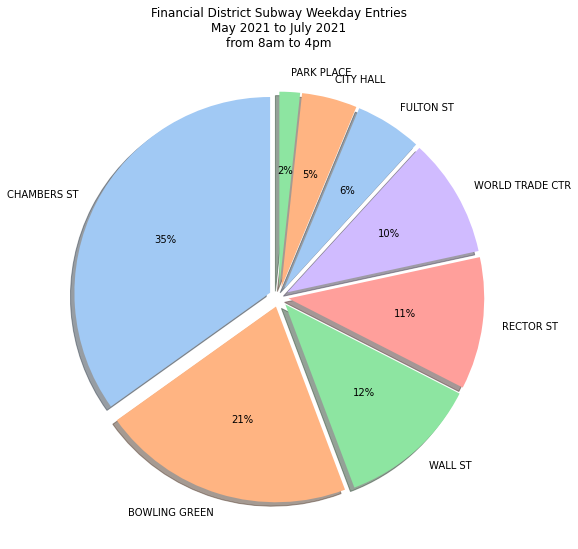

In [11]:
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(10,9))
plt.pie(df_pie['DELTA'], labels = df_pie.index.values.tolist(), colors = colors, autopct='%.0f%%', explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), startangle=90, shadow=True)
plt.title("Financial District Subway Weekday Entries\n" + "May 2021 to July 2021\n" + "from 8am to 4pm")

In [24]:
df_financial = df_all[df_all['STATION'].isin(list_finance)]
df_financial = df_financial[(df_financial['DATETIME'].dt.strftime('%H:%M:%S')=='08:00:00')|(df_financial['DATETIME'].dt.strftime('%H:%M:%S')=='12:00:00')|(df_financial['DATETIME'].dt.strftime('%H:%M:%S')=='16:00:00')]
df_financial = df_financial[pd.to_datetime(df_financial['DATETIME']).dt.dayofweek<5]
df_financial

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
8312,A047,R087,00-00-00,CITY HALL,NRW,BMT,08/23/2021,08:00:00,REGULAR,41859,53813,2021-08-23 08:00:00
8313,A047,R087,00-00-00,CITY HALL,NRW,BMT,08/23/2021,12:00:00,REGULAR,41872,53861,2021-08-23 12:00:00
8314,A047,R087,00-00-00,CITY HALL,NRW,BMT,08/23/2021,16:00:00,REGULAR,41907,53893,2021-08-23 16:00:00
8318,A047,R087,00-00-00,CITY HALL,NRW,BMT,08/24/2021,08:00:00,REGULAR,41962,53959,2021-08-24 08:00:00
8319,A047,R087,00-00-00,CITY HALL,NRW,BMT,08/24/2021,12:00:00,REGULAR,41975,54016,2021-08-24 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3692014,R208,R014,03-03-01,FULTON ST,2345ACJZ,IRT,12/30/2020,12:00:00,REGULAR,569155,2693923,2020-12-30 12:00:00
3692015,R208,R014,03-03-01,FULTON ST,2345ACJZ,IRT,12/30/2020,16:00:00,REGULAR,569173,2693992,2020-12-30 16:00:00
3692019,R208,R014,03-03-01,FULTON ST,2345ACJZ,IRT,12/31/2020,08:00:00,REGULAR,569194,2694117,2020-12-31 08:00:00
3692020,R208,R014,03-03-01,FULTON ST,2345ACJZ,IRT,12/31/2020,12:00:00,REGULAR,569200,2694179,2020-12-31 12:00:00


In [12]:
# Get the time graph for Chamber St and Bowling Green between 
df_chambergreen = df_all[(df_all['STATION']=='CHAMBERS ST')|(df_all['STATION']=='BOWLING GREEN')]

df_chambergreen = df_chambergreen[(df_chambergreen['DATETIME'].dt.strftime('%H:%M:%S')=='08:00:00')|(df_chambergreen['DATETIME'].dt.strftime('%H:%M:%S')=='12:00:00')|(df_chambergreen['DATETIME'].dt.strftime('%H:%M:%S')=='16:00:00')]

df_chambergreen = df_chambergreen[pd.to_datetime(df_chambergreen['DATETIME']).dt.dayofweek<5]

df_chambergreen
# get delta of entries per turnstile
df_chambergreen['DELTA'] = df_chambergreen.groupby(['STATION','C/A','UNIT','SCP','DATE'])['ENTRIES'].transform(lambda x : x.diff())
# drop rows with NaN delta entries
df_chambergreen.dropna(inplace=True)
df_chambergreen
# group per station per datetime
grp_chambergreen = df_chambergreen.groupby(['STATION', 'DATETIME']).DELTA.sum()
grp_chambergreen
df_chambergreen = grp_chambergreen.reset_index()
df_chambergreen

,STATION,DATETIME,DELTA
0,BOWLING GREEN,2021-05-03 12:00:00,1082.0
1,BOWLING GREEN,2021-05-03 16:00:00,1611.0
2,BOWLING GREEN,2021-05-04 12:00:00,1186.0
3,BOWLING GREEN,2021-05-04 16:00:00,1741.0
4,BOWLING GREEN,2021-05-05 12:00:00,1135.0
...,...,...,...
335,CHAMBERS ST,2021-08-25 16:00:00,4336.0
336,CHAMBERS ST,2021-08-26 12:00:00,2172.0
337,CHAMBERS ST,2021-08-26 16:00:00,4505.0
338,CHAMBERS ST,2021-08-27 12:00:00,1871.0


In [13]:
df_chambergreen['DAYNAME'] =df_chambergreen['DATETIME'].dt.day_name()
df_chambergreen['DAY'] =df_chambergreen['DATETIME'].dt.dayofweek
df_chambergreen

,STATION,DATETIME,DELTA,DAYNAME,DAY
0,BOWLING GREEN,2021-05-03 12:00:00,1082.0,Monday,0
1,BOWLING GREEN,2021-05-03 16:00:00,1611.0,Monday,0
2,BOWLING GREEN,2021-05-04 12:00:00,1186.0,Tuesday,1
3,BOWLING GREEN,2021-05-04 16:00:00,1741.0,Tuesday,1
4,BOWLING GREEN,2021-05-05 12:00:00,1135.0,Wednesday,2
...,...,...,...,...,...
335,CHAMBERS ST,2021-08-25 16:00:00,4336.0,Wednesday,2
336,CHAMBERS ST,2021-08-26 12:00:00,2172.0,Thursday,3
337,CHAMBERS ST,2021-08-26 16:00:00,4505.0,Thursday,3
338,CHAMBERS ST,2021-08-27 12:00:00,1871.0,Friday,4


In [14]:
df_chambergreen['PERIOD'] = np.where(df_chambergreen['DATETIME'].dt.strftime('%H:%M:%S')=='12:00:00', 'Morning','Afternoon')
df_chambergreen['WEEK'] = df_chambergreen['DATETIME'].dt.week
df_chambergreen

C:\Users\medch\AppData\Local\Temp/ipykernel_7796/1395418745.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_chambergreen['WEEK'] = df_chambergreen['DATETIME'].dt.week


,STATION,DATETIME,DELTA,DAYNAME,DAY,PERIOD,WEEK
0,BOWLING GREEN,2021-05-03 12:00:00,1082.0,Monday,0,Morning,18
1,BOWLING GREEN,2021-05-03 16:00:00,1611.0,Monday,0,Afternoon,18
2,BOWLING GREEN,2021-05-04 12:00:00,1186.0,Tuesday,1,Morning,18
3,BOWLING GREEN,2021-05-04 16:00:00,1741.0,Tuesday,1,Afternoon,18
4,BOWLING GREEN,2021-05-05 12:00:00,1135.0,Wednesday,2,Morning,18
...,...,...,...,...,...,...,...
335,CHAMBERS ST,2021-08-25 16:00:00,4336.0,Wednesday,2,Afternoon,34
336,CHAMBERS ST,2021-08-26 12:00:00,2172.0,Thursday,3,Morning,34
337,CHAMBERS ST,2021-08-26 16:00:00,4505.0,Thursday,3,Afternoon,34
338,CHAMBERS ST,2021-08-27 12:00:00,1871.0,Friday,4,Morning,34


In [18]:
grp = df_chambergreen.groupby(['STATION','DAY','DAYNAME','PERIOD'])['DELTA'].mean()
grp
df_chambergreen = grp.reset_index()
df_chambergreen.sort_values(by=['DAY','PERIOD'], ascending=[True,False],inplace=True)

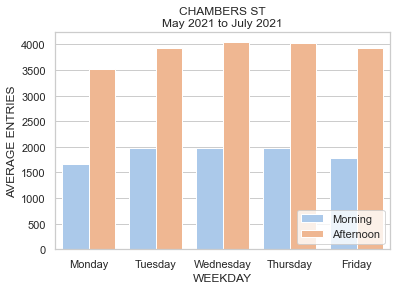

In [19]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="DAYNAME", y="DELTA", hue="PERIOD", data=df_chambergreen[df_chambergreen['STATION']=='CHAMBERS ST'], palette="pastel")
ax.set(xlabel='WEEKDAY', ylabel='AVERAGE ENTRIES')
ax.set_title("CHAMBERS ST\n"+"May 2021 to July 2021")
plt.legend(loc='lower right')

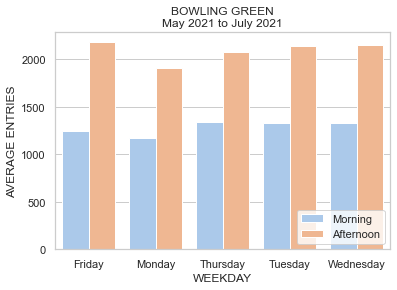

In [17]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="DAYNAME", y="DELTA", hue="PERIOD", data=df_chambergreen[df_chambergreen['STATION']=='BOWLING GREEN'], palette="pastel")
ax.set(xlabel='WEEKDAY', ylabel='AVERAGE ENTRIES')
ax.set_title("BOWLING GREEN\n"+"May 2021 to July 2021")
plt.legend(loc='lower right')